# Neural Network Assignment
## Telco Churn Prediction with Artificial Neural Networks (ANN)
---


In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
# Step 0: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [206]:
# Step 1: Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BUSA 730/Telco-Customer-Churn.csv')# this loads the dataset
df.head()# this shows the first five columns of the dataset


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [207]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

DATA DICTIONARY
| Column             | Description                                                                                   |
| ------------------ | --------------------------------------------------------------------------------------------- |
| `customerID`       | Unique identifier assigned to each customer.                                                  |
| `gender`           | Customer's gender (e.g., Male, Female).                                                       |
| `SeniorCitizen`    | Indicates if the customer is a senior (1 = Yes, 0 = No).                                      |
| `Partner`          | Whether the customer has a partner (Yes/No).                                                  |
| `Dependents`       | Whether the customer has dependents (Yes/No).                                                 |
| `tenure`           | Number of months the customer has been with the company.                                      |
| `PhoneService`     | Whether the customer subscribes to phone service (Yes/No).                                    |
| `MultipleLines`    | Whether the customer has multiple phone lines (Yes/No/No phone service).                      |
| `InternetService`  | Type of internet service the customer has (DSL, Fiber optic, None).                           |
| `OnlineSecurity`   | Whether the customer has online security add-on (Yes/No/No internet service).                 |
| `OnlineBackup`     | Whether the customer has online backup service (Yes/No/No internet service).                  |
| `DeviceProtection` | Whether the customer has device protection plan (Yes/No/No internet service).                 |
| `TechSupport`      | Whether the customer has tech support subscription (Yes/No/No internet service).              |
| `StreamingTV`      | Whether the customer subscribes to TV streaming service (Yes/No/No internet service).         |
| `StreamingMovies`  | Whether the customer subscribes to movie streaming service (Yes/No/No internet service).      |
| `Contract`         | Type of contract the customer has (Month-to-month, One year, Two year).                       |
| `PaperlessBilling` | Whether the customer uses paperless billing (Yes/No).                                         |
| `PaymentMethod`    | Customer’s payment method (e.g., Electronic check, Credit card, Bank transfer, Mailed check). |
| `MonthlyCharges`   | Amount charged to the customer per month.                                                     |
| `TotalCharges`     | Total amount charged to the customer over their tenure.                                       |
| `Churn`            | Indicates if the customer has left the company (Yes = churned, No = active).                  |


## Part 1: Data Preprocessing (2 pts)



In [208]:
# Dropping columns
df= df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## we are dropping the column customer id because it will not help in predictive modelling

In [209]:
# Let's check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 




*   19 columns and 7043 rows make up this dataset
*  lets see why totalcharges is labelled as object ??



In [210]:
# Find rows where TotalCharges is not numeric
non_numeric_rows = df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

# Display the problematic rows
print(non_numeric_rows)


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 N

In [211]:
# Convert to numeric, turning non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df = df.dropna(subset=['TotalCharges'])


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

# we dropped the rows containing non numeric rows in the column total charges and now we have the datatype as float

In [213]:
# Convert all object columns to category
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Verify conversion
print(df.dtypes)


gender              category
SeniorCitizen          int64
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


The "object" type is a flexible, generic placeholder, often used for strings, but can lack structure. Converting to "category" explicitly declares that the data represents discrete groups, which helps the system optimize memory and processing by storing only the unique categories.


Observations:

* There are 7032 observations after dropping empty rows and 20 columns in the data including churn
* All the columns are of numeric(4) and categorical(17) data type.
* There are no missing values in the data.

In [214]:
# Let's check the summary statistics of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observations:

* 32 is the average number of months most of the people choose to stay with the company

* 64 $ is the average montly charge

* 2283.300441 $ is the average total charge



# Univariate analysis


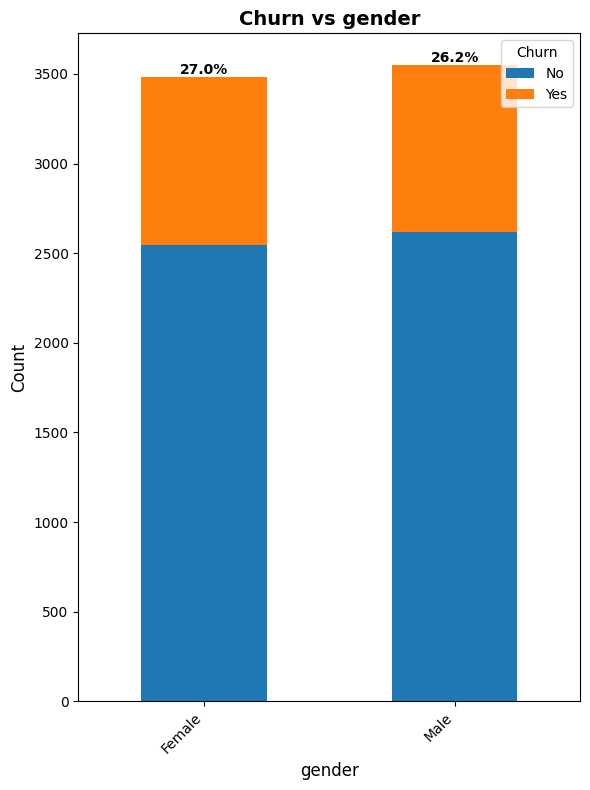

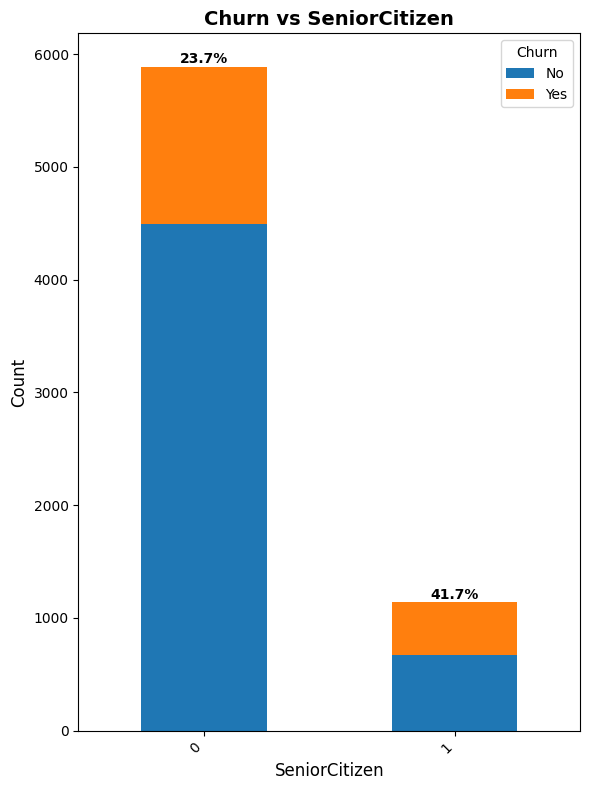

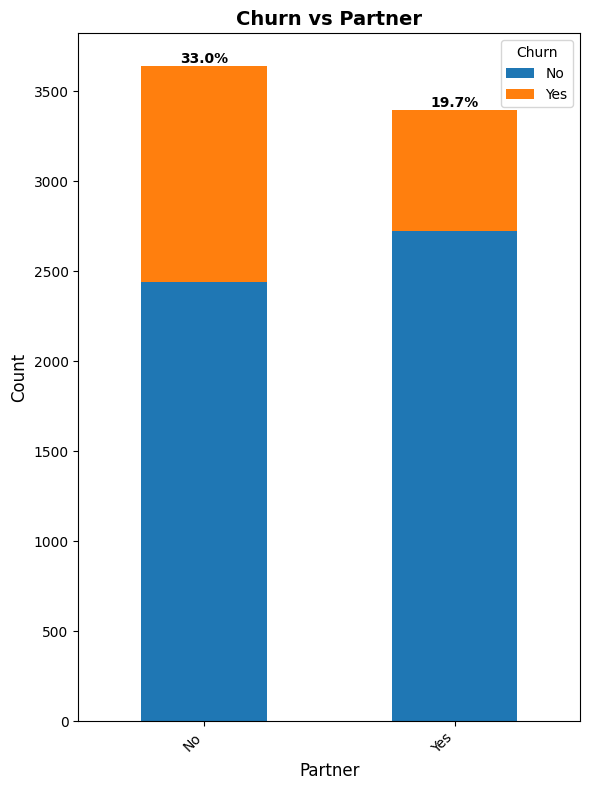

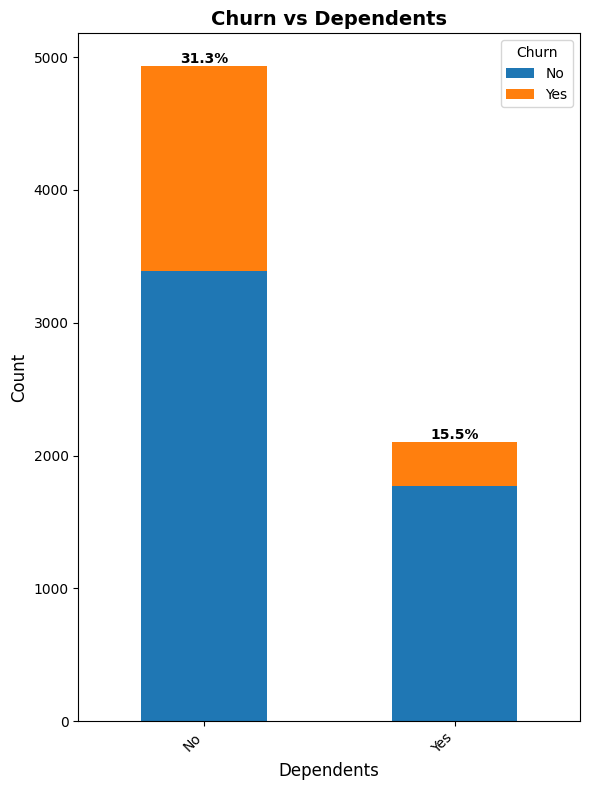

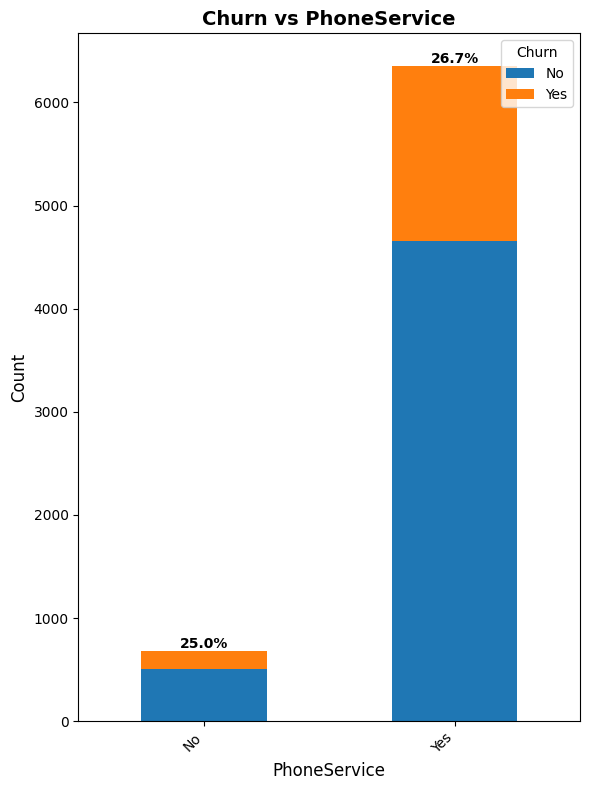

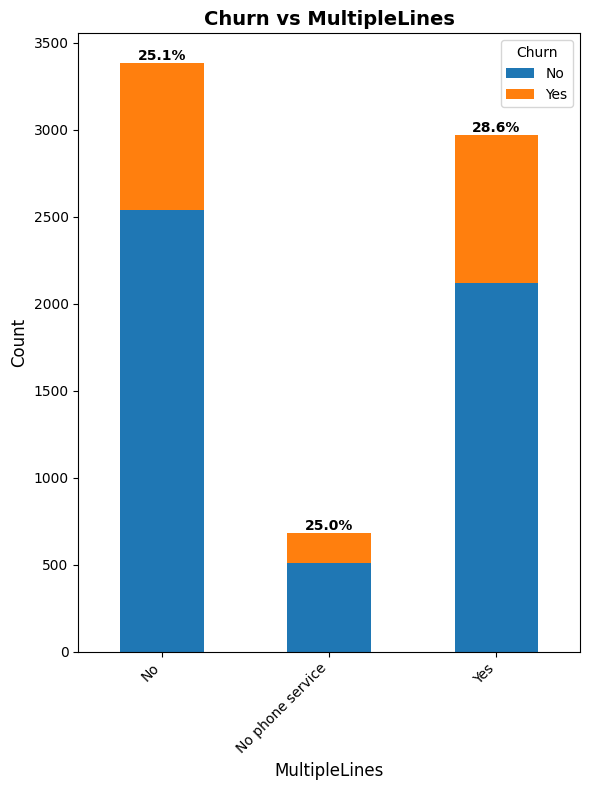

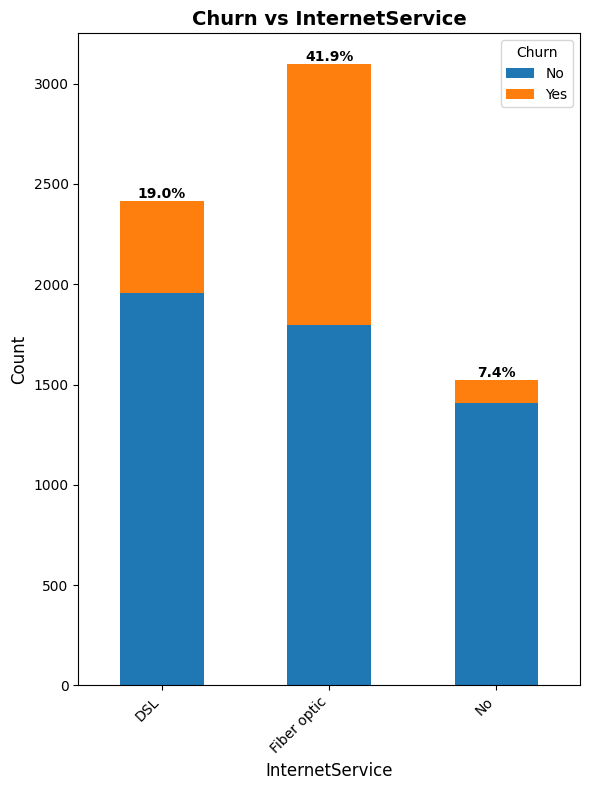

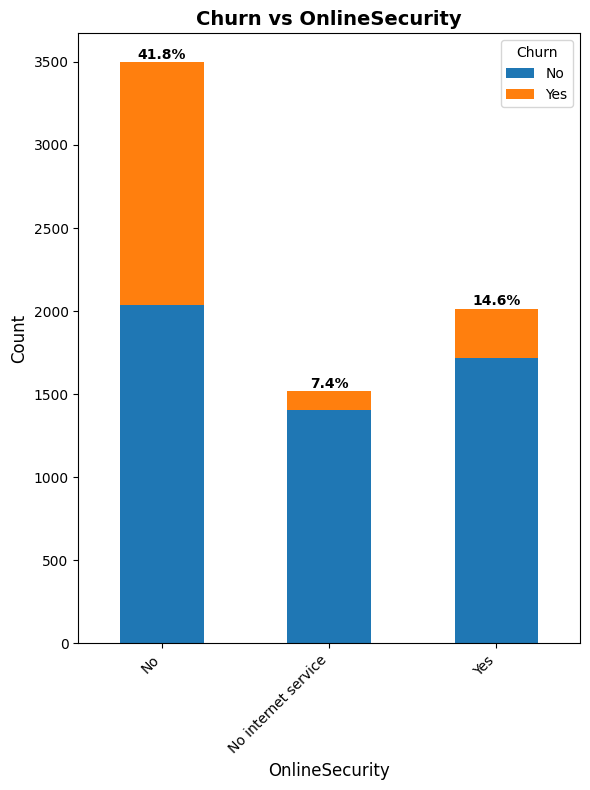

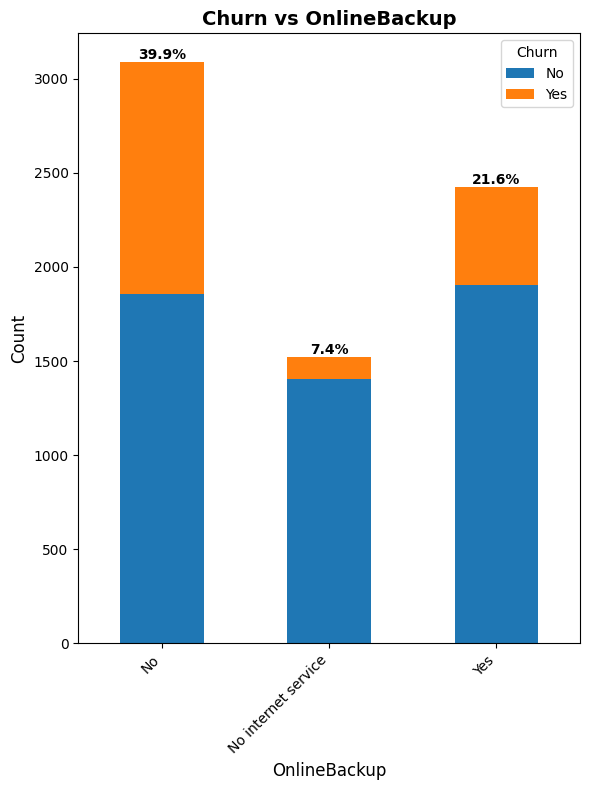

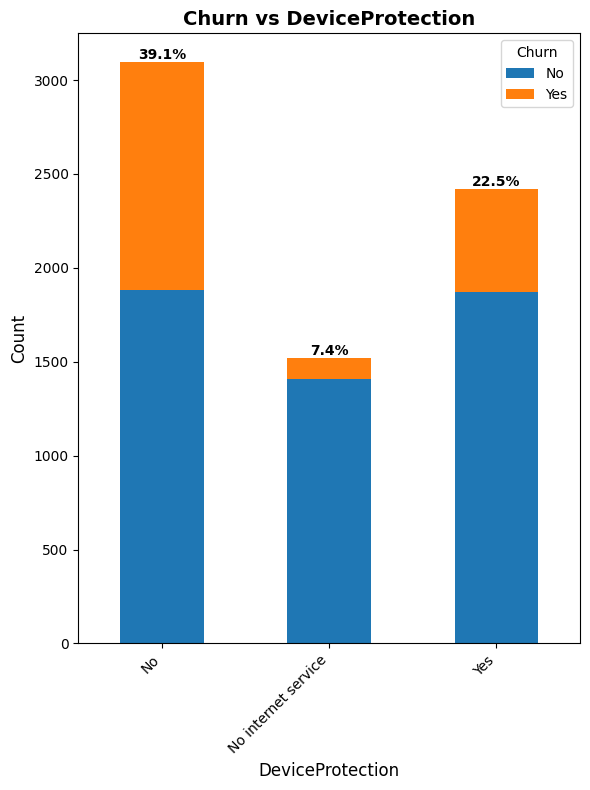

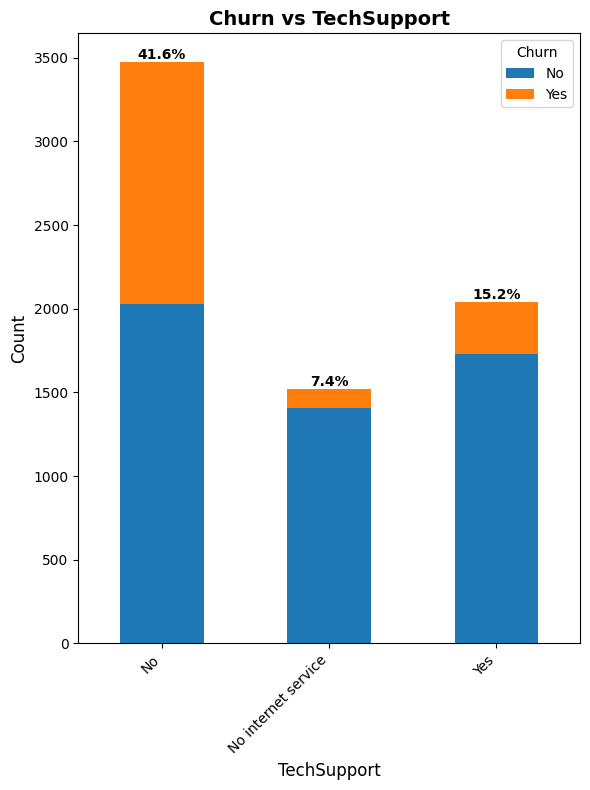

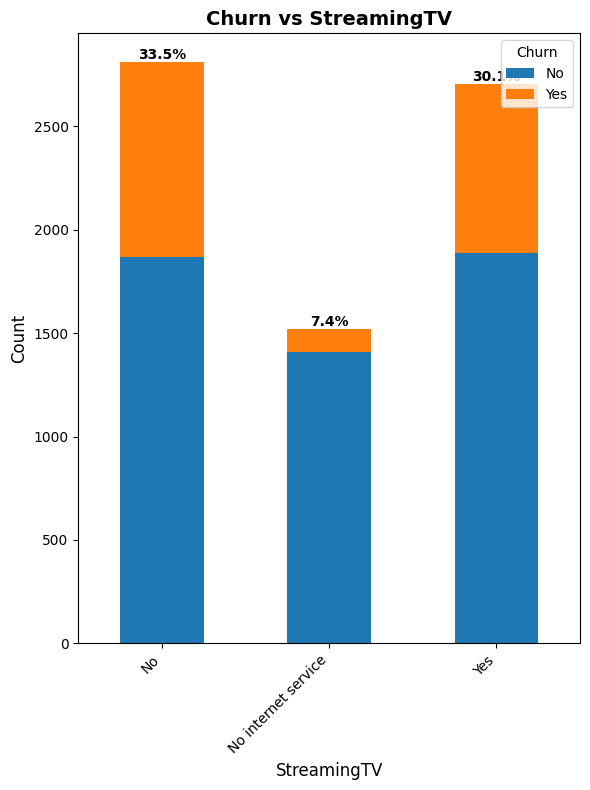

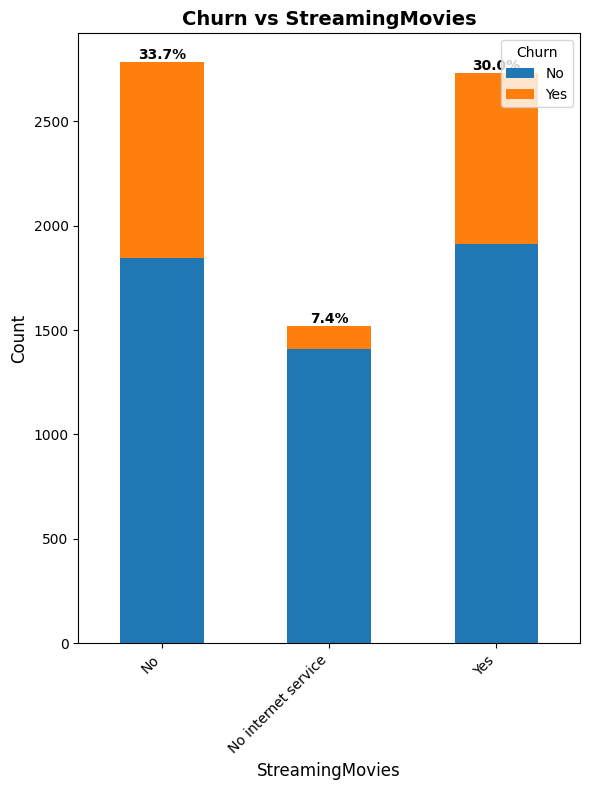

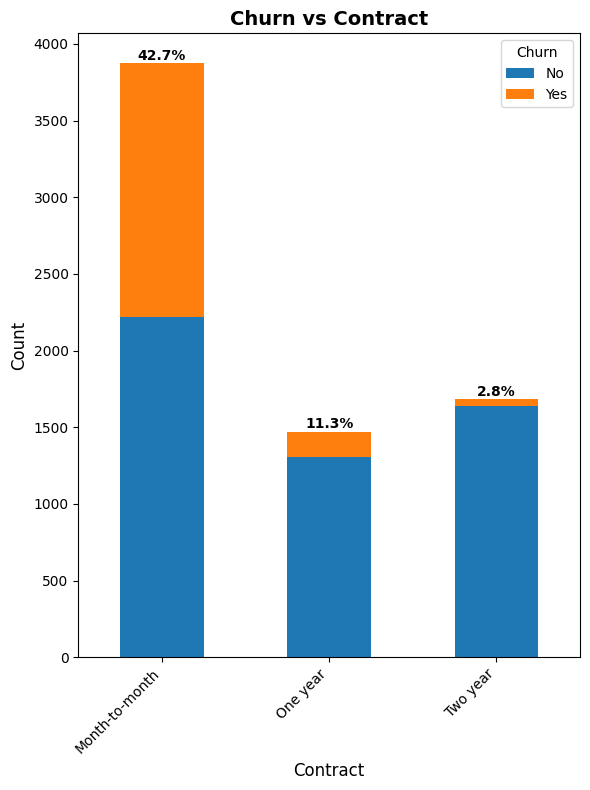

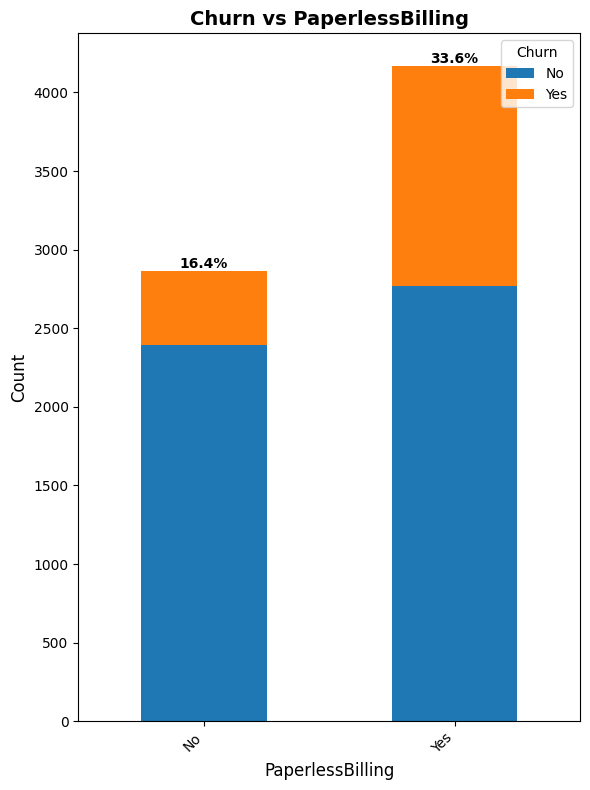

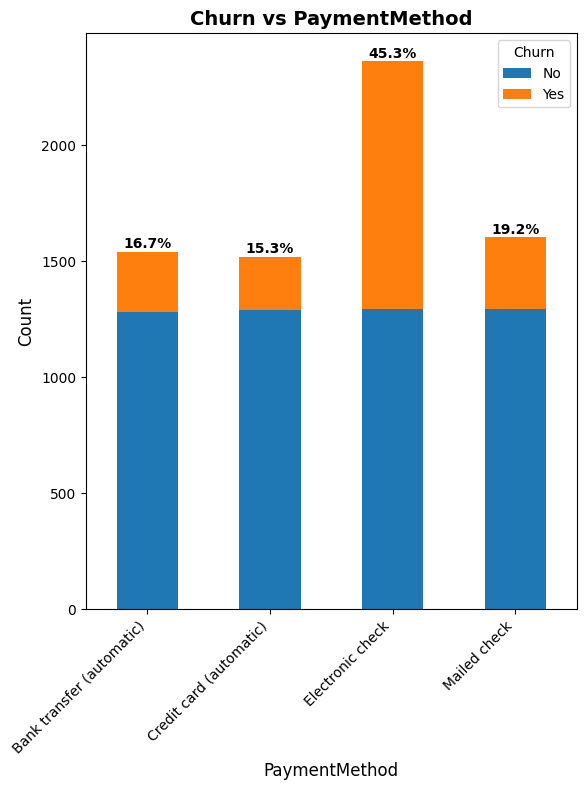

In [215]:
import matplotlib.pyplot as plt
import pandas as pd

# List of categorical variables
categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
              'PhoneService', 'MultipleLines', 'InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling', 'PaymentMethod']

for cat in categories:
    # Create crosstab
    risk_counts = pd.crosstab(df[cat], df['Churn'])

    # Identify the churn-positive column (assuming "Yes" or 1 is the positive label)
    churn_positive_label = [col for col in risk_counts.columns if str(col).lower() in ['1', 'yes', 'true']]

    if len(churn_positive_label) == 0:
        print(f"⚠️ Skipped '{cat}' — could not find a churn-positive label in {list(risk_counts.columns)}")
        continue  # skip this variable if no churn-positive column found

    churn_col = churn_positive_label[0]

    # Compute churn rate percentage
    churn_rate = (risk_counts[churn_col] / risk_counts.sum(axis=1)) * 100

    # Plot stacked bar chart
    ax = risk_counts.plot(kind='bar', stacked=True, figsize=(6,8), color=['#1f77b4', '#ff7f0e'])

    # Title and labels
    plt.title(f'Churn vs {cat}', fontsize=14, fontweight='bold')
    plt.xlabel(cat, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn', loc='upper right')

    # Annotate churn percentages
    for i, total in enumerate(risk_counts.sum(axis=1)):
        if total > 0:
            pct = churn_rate.iloc[i]
            ax.text(i, total + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    plt.tight_layout()
    plt.show()

shows us the categorical variables in respect to target variable with all the categories in a stacked bar chart

Observations:

* Almost all the categories have 10-20% churn
* categoreies such as the two year contract,the one year contract
and people that opt out of internet service have less churn compared to the other

/tmp/ipython-input-1285725199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette=['#4CAF50','#F44336'])
/tmp/ipython-input-1285725199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette=['#4CAF50','#F44336'])
/tmp/ipython-input-1285725199.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, palette=['#4CAF50','#F44336'])


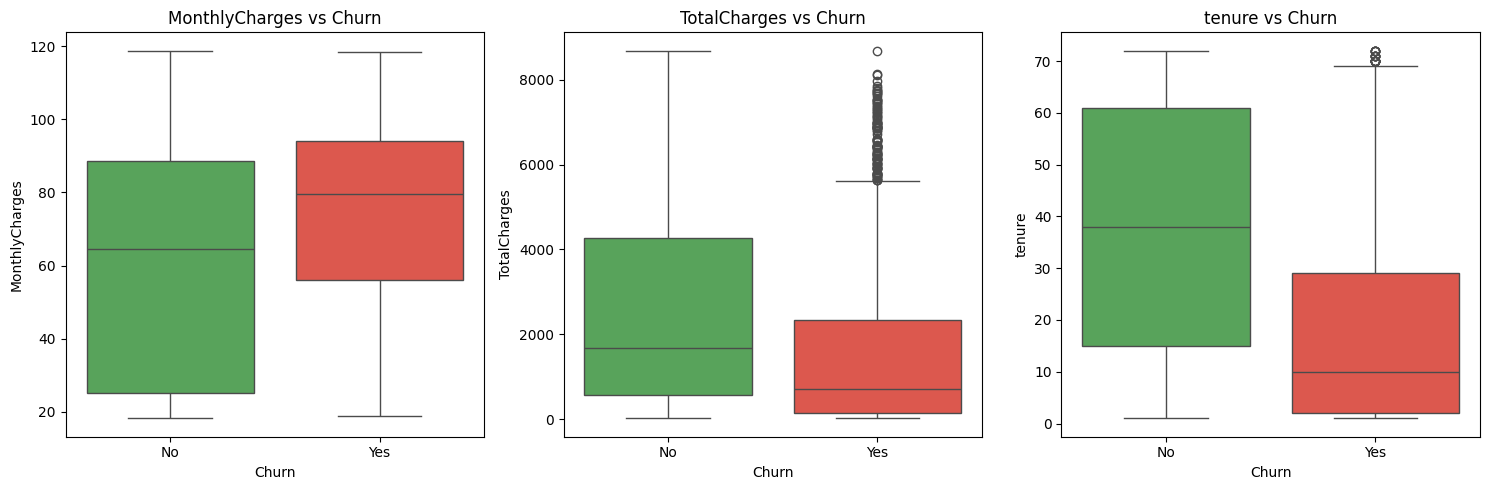

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous variables
continuous_vars = ['MonthlyCharges', 'TotalCharges', 'tenure']

plt.figure(figsize=(15, 5))

for i, var in enumerate(continuous_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x='Churn', y=var, palette=['#4CAF50','#F44336'])
    plt.title(f'{var} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)

plt.tight_layout()
plt.show()



# Observations

* Customers in the early stages of their lifecycle show a significantly higher likelihood of churn.
* customers with high monthly charges show a higher churn compared to lower monthly charges


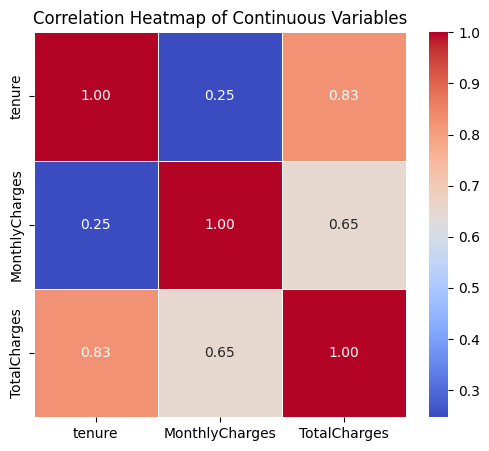

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explicitly define continuous numerical variables
continuous_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Compute correlation matrix
corr = df[continuous_vars].corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


tenure and monthly charges have a positive correlation
this means that as tenure increases, so does monthly charges
 and vice versa which show us a little promotional offer might be going on for new customers

Data Preparation
This dataset contains both numerical and categorical features.
we need to one hot encode the categorical variable and scale the numerical variables

we will scale it after splitting to avoid data leakage


In [218]:
import pandas as pd

categories = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

# Assuming df is your DataFrame
df_encoded = pd.get_dummies(df, columns=categories, drop_first=False, dtype=int)



In [219]:
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [220]:
len(df_encoded.columns)

47

Now, let's split the dataset into train and test datasets. To do that, we would be extracting all the independent variables and save them into a variable features. And the target variable churn would be saved into a variable target. These two variables will be used to split the parent dataset into train and test datasets.

In [221]:
df["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.734215
Yes,0.265785


In [222]:
features = df_encoded.drop(['Churn'], axis=1)

target = df_encoded['Churn']

In [223]:
# Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42,stratify=target)

In [224]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [225]:
X_test_normalized = scaler.transform(X_test)

In [226]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_int = le.fit_transform(y_train)
y_test_int  = le.transform(y_test)

print("Unique classes:", le.classes_)
print("y_train_int shape:", y_train_int.shape)

Unique classes: ['No' 'Yes']
y_train_int shape: (5625,)


In [227]:
print("X_train_normalized shape:", X_train_normalized.shape)

X_train_normalized shape: (5625, 46)


## Part 2: Metric Choice & Justification (3 pts)


*ultimatley it will depend on the profit function weather it is easier to accuqire new customers or better to keep accuquried customes *


## i think false negative is the metrics to focus on or recall when it is predicted not to churn but customer leaves is the major metric choice so we should try and minimize false negative as we dont want to predict a customer will stay and he ends up leaving we need to intervene provide incentives to make them stay

# ***we will select to minimise recall as the cost for false negative is very high***



## Part 3: Initial Model Building (5 pts)
- Build ANN with ≥2 hidden layers, ReLU activations, sigmoid output
- Binary crossentropy loss, Adam optimizer
- Train with batch size 32, up to 100 epochs (use early stopping)


In [228]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [229]:
# We will be adding the layers sequentially
model = Sequential()

# First hidden layer with 256 neurons and relu activation function, the input shape tuple denotes number of independent variables
model.add(Dense( 256, activation='relu', input_shape=(46,)))

# We will be switching 40% of neurons off randomly at each iteration to avoid overfitting
model.add(Dropout(0.4))

# Second hidden layer with 128 neurons and relu activation function
model.add(Dense( 128 , activation='relu'))

# We will be switching 30% of neurons off randomly at each iteration to avoid overfitting
model.add(Dropout(0.3))

# third  hidden layer with 64 neurons and relu activation function
model.add(Dense(64, activation='relu'))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model.add(Dropout(0.2))

# fourth hidden layer with 32 neurons and relu activation function
model.add(Dense(32, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of customers  churning or not
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# i chose 256 neurons as the data has 46 input and the dataset is close to 7000 rows therefore it is not a simple dataset and i chose 4 layers to fit the dataset

Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.

Since this is a binary classification task, we will be minimizing the binary_crossentropy and we can choose one optimizer out of

* SGD
* RMSprop
* Adam
* Adadelta
* Adagrad
* Adamax
* Nadam
* Ftrl

This is a hyper-parameter.


In [230]:
# Compile with loss function and optimizer
from keras.metrics import Precision, Recall
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

In [231]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,297 (216.00 KB)

 Trainable params: 55,297 (216.00 KB)

 Non-trainable params: 0 (0.00 B)

In [232]:


history = model.fit(X_train_normalized, y_train_int, validation_data=(X_test_normalized, y_test_int),
                    epochs=100, batch_size=32, callbacks=[EarlyStopping(patience=5)])


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7308 - loss: 0.5226 - precision: 0.4932 - recall: 0.1914 - val_accuracy: 0.7626 - val_loss: 0.4605 - val_precision: 0.5412 - val_recall: 0.7032
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7823 - loss: 0.4503 - precision: 0.6162 - recall: 0.5083 - val_accuracy: 0.7925 - val_loss: 0.4461 - val_precision: 0.6035 - val_recall: 0.6390
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7896 - loss: 0.4415 - precision: 0.6437 - recall: 0.4928 - val_accuracy: 0.7903 - val_loss: 0.4453 - val_precision: 0.5956 - val_recall: 0.6578
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7933 - loss: 0.4366 - precision: 0.6405 - recall: 0.5294 - val_accuracy: 0.7974 - val_loss: 0.4466 - val_precision: 0.6290 - val_recall: 0.5802
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7911 - loss: 0.4335 - precision: 0.6461 - recall: 0.4976 - val_accuracy: 0.7960 - val_lo

In [235]:
class LearningProgressCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f"Epoch {epoch:2d} | "
                  f"Loss: {logs['loss']:.4f} | "
                  f"Acc: {logs['accuracy']:.3f} | "
                  f"Recall: {logs['recall']:.3f} | "
                  f"Val_Acc: {logs.get('val_accuracy', 0):.3f} | "
                  f"Val_Recall: {logs.get('val_recall', 0):.3f}")

In [236]:
history = model.fit(
    X_train_normalized, y_train_int,
    batch_size=32,
    epochs=50,
    validation_data=(X_test_normalized, y_test_int),
    callbacks=[LearningProgressCallback()],
    verbose=0
)

Epoch  0 | Loss: 0.3101 | Acc: 0.848 | Recall: 0.712 | Val_Acc: 0.780 | Val_Recall: 0.540
Epoch 10 | Loss: 0.2957 | Acc: 0.861 | Recall: 0.743 | Val_Acc: 0.775 | Val_Recall: 0.578
Epoch 20 | Loss: 0.2901 | Acc: 0.867 | Recall: 0.748 | Val_Acc: 0.774 | Val_Recall: 0.599
Epoch 30 | Loss: 0.2773 | Acc: 0.871 | Recall: 0.752 | Val_Acc: 0.768 | Val_Recall: 0.572
Epoch 40 | Loss: 0.2773 | Acc: 0.867 | Recall: 0.757 | Val_Acc: 0.770 | Val_Recall: 0.578


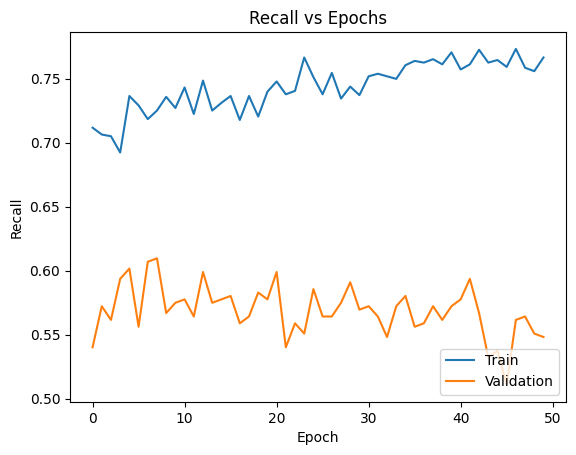

In [237]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall vs Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

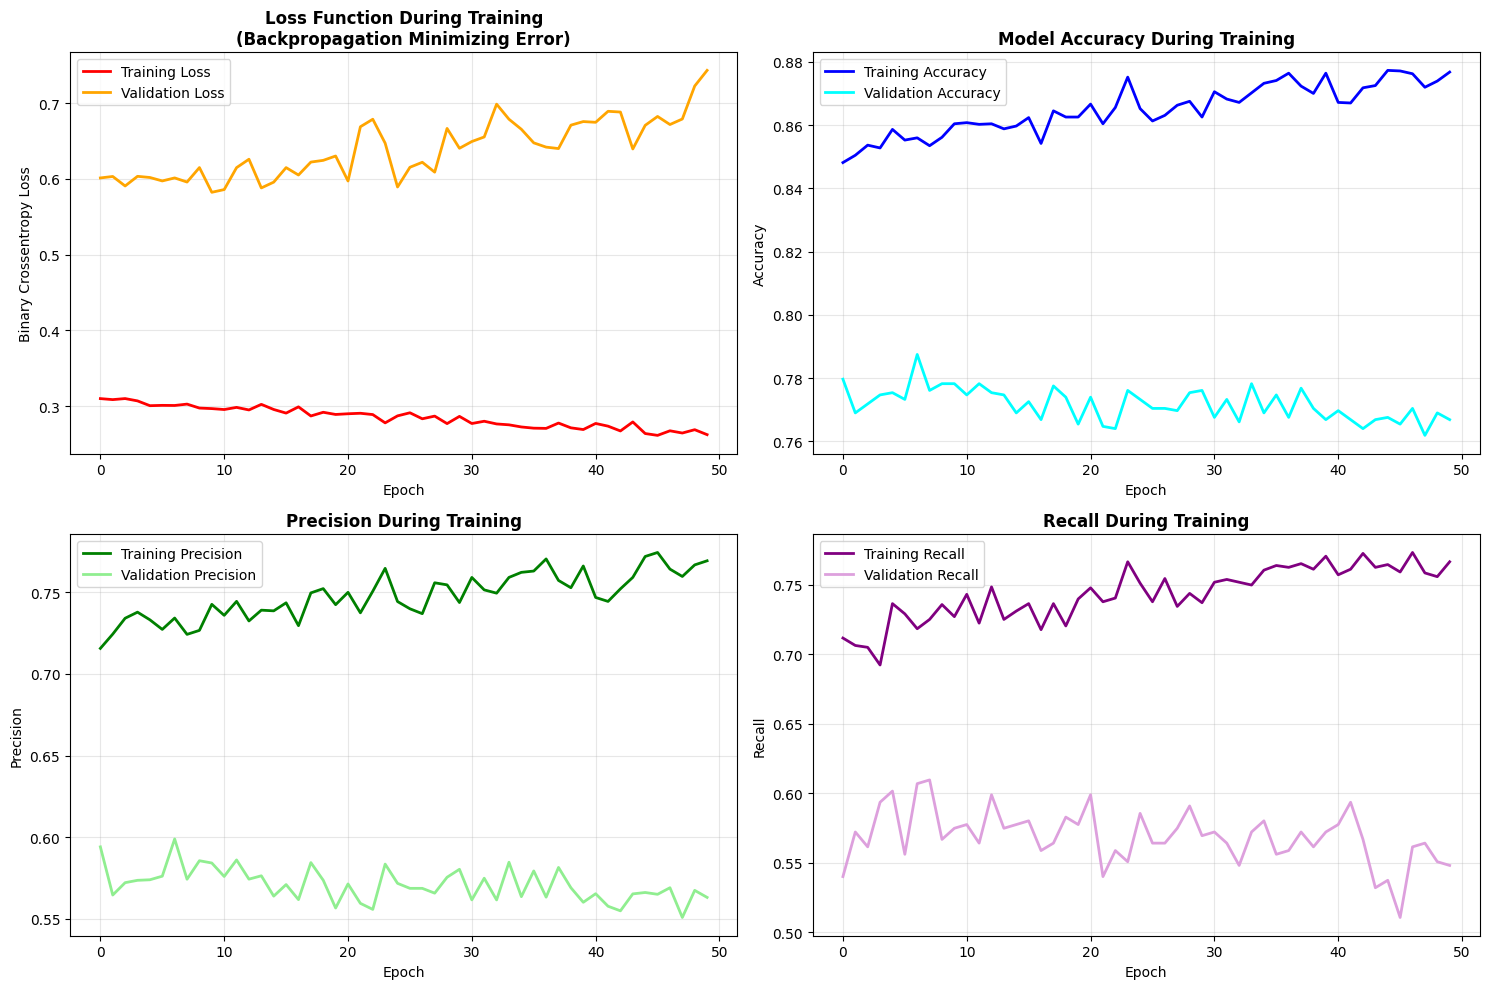

In [239]:
# Visualize the learning process
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# Loss over time
ax1.plot(history.history['loss'], label='Training Loss', color='red', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
ax1.set_title('Loss Function During Training\n(Backpropagation Minimizing Error)', fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Crossentropy Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy over time
ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='cyan', linewidth=2)
ax2.set_title('Model Accuracy During Training', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Precision over time
ax3.plot(history.history['precision'], label='Training Precision', color='green', linewidth=2)
ax3.plot(history.history['val_precision'], label='Validation Precision', color='lightgreen', linewidth=2)
ax3.set_title('Precision During Training', fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Precision')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Recall over time
ax4.plot(history.history['recall'], label='Training Recall', color='purple', linewidth=2)
ax4.plot(history.history['val_recall'], label='Validation Recall', color='plum', linewidth=2)
ax4.set_title('Recall During Training', fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Recall')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

observations:

The training recall is increasing with the increase in the epochs.
but valdidation recall is decreasing
The model is giving low  recall . After14 epochs, the recall of the model on the training data is about 50%  and the validation recall is 55%.
The validation accuracy is closer to the training accuracy.


## Part 4: Evaluation (5 pts)
- Accuracy, classification report, confusion matrix
- Learning curves and ROC curve
- ROC-AUC score
- Emphasize your chosen metric when interpreting results


In [240]:
# Evaluate on test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test_normalized, y_test_int, verbose=0)

In [241]:
# Make predictions
predictions = model.predict(X_test_normalized, verbose=0)
predicted_classes = (predictions > 0.5).astype(int)

In [242]:
print(classification_report(y_test_int, predicted_classes,
                          target_names=['Will Stay', 'Will Leave']))

              precision    recall  f1-score   support

   Will Stay       0.84      0.85      0.84      1033
  Will Leave       0.56      0.55      0.56       374

    accuracy                           0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.77      0.77      1407



In [243]:
cm = confusion_matrix(y_test_int, predicted_classes)

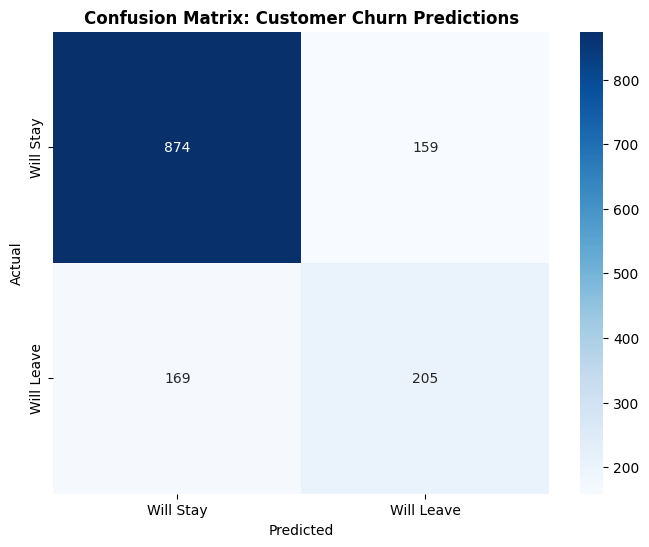

In [244]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Will Stay', 'Will Leave'],
            yticklabels=['Will Stay', 'Will Leave'])
plt.title('Confusion Matrix: Customer Churn Predictions', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


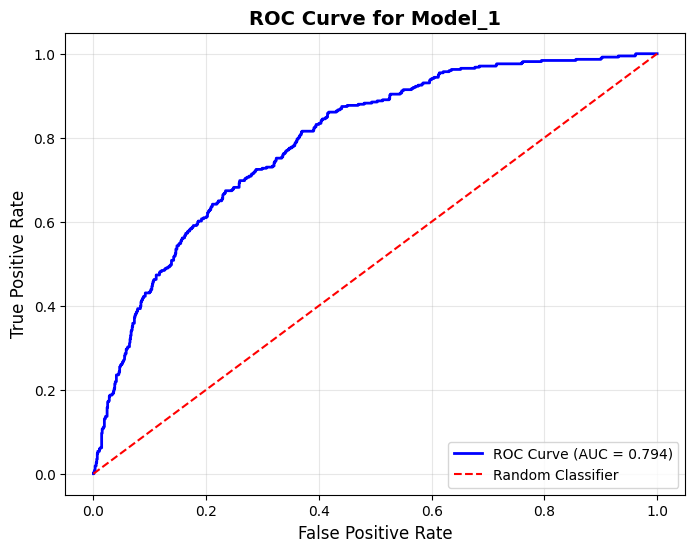

AUC Score: 0.794


In [245]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get predicted probabilities for the positive class
y_pred_prob = model.predict(X_test_normalized).ravel()   # Flatten to 1D array

# Step 2: Compute ROC curve coordinates
fpr, tpr, thresholds = roc_curve(y_test_int, y_pred_prob)

# Step 3: Calculate Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')

# Step 5: Formatting
plt.title('ROC Curve for Model_1', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

print(f"AUC Score: {roc_auc:.3f}")

### our model distinguishes between the two classes (churn vs non-churn) correctly 80% of the time based on predicted probabilities.

# it has high recall and we need to use tuning techniques to capture recall better lets try with builiding new models


# **Second model**  

In [246]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [247]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [248]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers


print(f"\nExperiment 2: Optimizer Comparison")

optimizers = ['adam', 'sgd', 'rmsprop']
optimizer_results = []

for opt in optimizers:
    opt_model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(46,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    opt_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])

    opt_history = opt_model.fit(X_train_normalized, y_train_int, epochs=30,
                               validation_data=(X_test_normalized, y_test_int), verbose=0)

    final_acc = opt_history.history['val_Recall'][-1]
    optimizer_results.append((opt.upper(), final_acc))
    print(f"   {opt.upper()}: {final_acc:.3f} Recall")

print(f"\nOptimizer Comparison:")
best_opt = max(optimizer_results, key=lambda x: x[1])
for opt, acc in optimizer_results:
    marker = " (BEST)" if (opt, acc) == best_opt else ""
    print(f"   {opt}: {acc:.1%}{marker}")


Experiment 2: Optimizer Comparison


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   ADAM: 0.551 Recall
   SGD: 0.591 Recall
   RMSPROP: 0.623 Recall

Optimizer Comparison:
   ADAM: 55.1%
   SGD: 59.1%
   RMSPROP: 62.3% (BEST)


# RMSprop has the best  recall

In [249]:
print("Experiment 1: Architecture Comparison")

# Quick architecture comparison
architectures = [
    ([8,4,2], "Simple: 3 hidden layer"),
    ([32,16, 8], "Medium: 3 hidden layers"),
    ([256,128, 64, 32], "Complex: 4 hidden layers")
]

results = []
for arch, desc in architectures:
    # Build quick model
    quick_model = keras.Sequential()
    quick_model.add(keras.layers.Dense(arch[0], activation='relu', input_shape=(46,)))
    for units in arch[1:]:
        quick_model.add(keras.layers.Dense(units, activation='relu'))
    quick_model.add(keras.layers.Dense(1, activation='sigmoid'))

    quick_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

    # Quick training
    quick_history = quick_model.fit(X_train_normalized, y_train_int, epochs=30,
                                   validation_data=(X_test_normalized, y_test_int), verbose=0)

    final_acc = quick_history.history['val_Recall'][-1]
    results.append((desc, final_acc))
    print(f"   {desc}: {final_acc:.3f} Recall")

print(f"\nArchitecture Experiment Results:")
best_arch = max(results, key=lambda x: x[1])
for desc, acc in results:
    marker = " (BEST)" if (desc, acc) == best_arch else ""
    print(f"   {desc}: {acc:.1%}{marker}")

print(f"\nBest architecture: {best_arch[0]} with {best_arch[1]:.1%} Recall")

Experiment 1: Architecture Comparison
   Simple: 3 hidden layer: 0.537 Recall
   Medium: 3 hidden layers: 0.567 Recall
   Complex: 4 hidden layers: 0.628 Recall

Architecture Experiment Results:
   Simple: 3 hidden layer: 53.7%
   Medium: 3 hidden layers: 56.7%
   Complex: 4 hidden layers: 62.8% (BEST)

Best architecture: Complex: 4 hidden layers with 62.8% Recall


after looking at both the models i have decided to go with a **complex architecture** and **RMSprop** for my second model

In [250]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [251]:
# Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [252]:
# We will be adding the layers sequentially
model_2 = Sequential()

# First hidden layer with 256 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_2.add(Dense( 256, activation='relu', input_shape=(46,)))

# We will be switching 40% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.4))

# Second hidden layer with 128 neurons and relu activation function
model_2.add(Dense( 128 , activation='relu'))

# We will be switching 30% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.3))

# third  hidden layer with 64 neurons and relu activation function
model_2.add(Dense(64, activation='relu'))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.2))

# fourth hidden layer with 32 neurons and relu activation function
model_2.add(Dense(32, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_2.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of customers  churning or not
model_2.add(Dense(1, activation='sigmoid'))

In [253]:
# Compile with loss function and optimizer
from keras.metrics import Precision, Recall
model_2.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

In [254]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        12,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,893 (648.02 KB)

 Trainable params: 55,297 (216.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 110,596 (432.02 KB)

In [255]:


history_2 = model_2.fit(X_train_normalized, y_train_int, validation_data=(X_test_normalized, y_test_int),
                    epochs=150, batch_size=50, callbacks=[EarlyStopping(patience=10)])


Epoch 1/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.7435 - loss: 0.5065 - precision: 0.5485 - recall: 0.2198 - val_accuracy: 0.7775 - val_loss: 0.4513 - val_precision: 0.5704 - val_recall: 0.6604
Epoch 2/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7807 - loss: 0.4518 - precision: 0.6148 - recall: 0.5003 - val_accuracy: 0.7960 - val_loss: 0.4417 - val_precision: 0.6173 - val_recall: 0.6123
Epoch 3/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7891 - loss: 0.4431 - precision: 0.6334 - recall: 0.5161 - val_accuracy: 0.7982 - val_loss: 0.4381 - val_precision: 0.6339 - val_recall: 0.5695
Epoch 4/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7907 - loss: 0.4365 - precision: 0.6386 - recall: 0.5149 - val_accuracy: 0.7960 - val_loss: 0.4391 - val_precision: 0.6322 - val_recall: 0.5561
Epoch 5/150
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4287 - precision: 0.6643 - recall: 0.5112 - val_accuracy: 0.7982 - val_lo

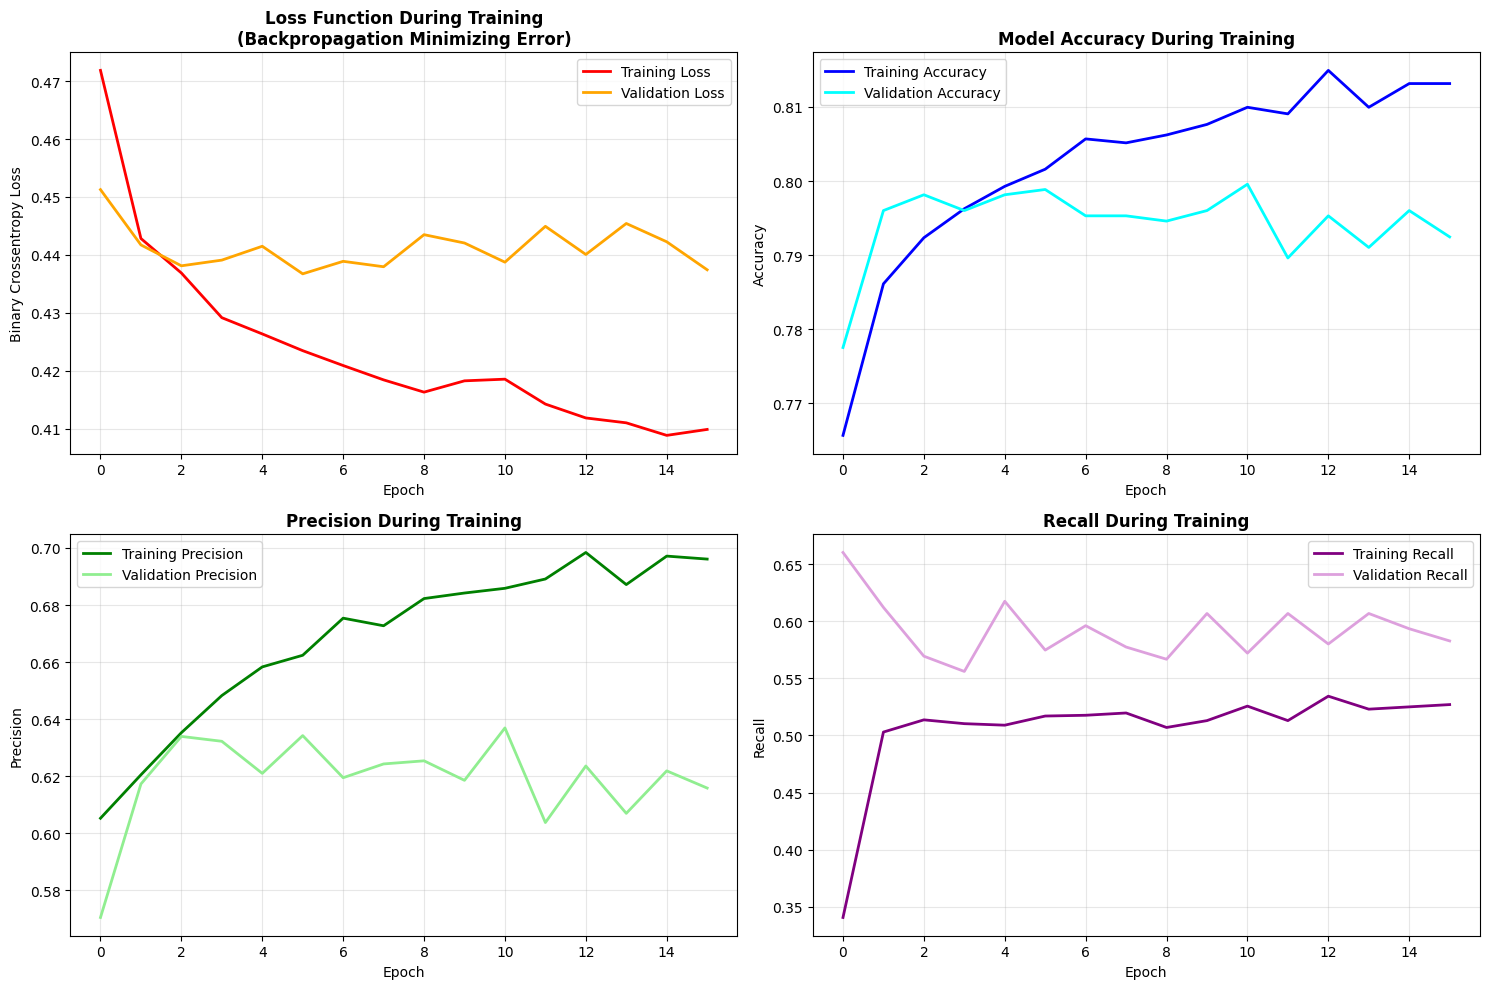

In [256]:
# Visualize the learning process
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# Loss over time
ax1.plot(history_2.history['loss'], label='Training Loss', color='red', linewidth=2)
ax1.plot(history_2.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
ax1.set_title('Loss Function During Training\n(Backpropagation Minimizing Error)', fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Crossentropy Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy over time
ax2.plot(history_2.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax2.plot(history_2.history['val_accuracy'], label='Validation Accuracy', color='cyan', linewidth=2)
ax2.set_title('Model Accuracy During Training', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Precision over time
ax3.plot(history_2.history['precision'], label='Training Precision', color='green', linewidth=2)
ax3.plot(history_2.history['val_precision'], label='Validation Precision', color='lightgreen', linewidth=2)
ax3.set_title('Precision During Training', fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Precision')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Recall over time
ax4.plot(history_2.history['recall'], label='Training Recall', color='purple', linewidth=2)
ax4.plot(history_2.history['val_recall'], label='Validation Recall', color='plum', linewidth=2)
ax4.set_title('Recall During Training', fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Recall')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [257]:
# Evaluate on test set
test_loss, test_accuracy, test_precision, test_recall = model_2.evaluate(X_test_normalized, y_test_int, verbose=0)

In [258]:
# Make predictions
predictions = model_2.predict(X_test_normalized, verbose=0)
predicted_classes = (predictions > 0.5).astype(int)

In [259]:
print(classification_report(y_test_int, predicted_classes,
                          target_names=['Will Stay', 'Will Leave']))

              precision    recall  f1-score   support

   Will Stay       0.85      0.87      0.86      1033
  Will Leave       0.62      0.58      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



In [260]:
cm = confusion_matrix(y_test_int, predicted_classes)

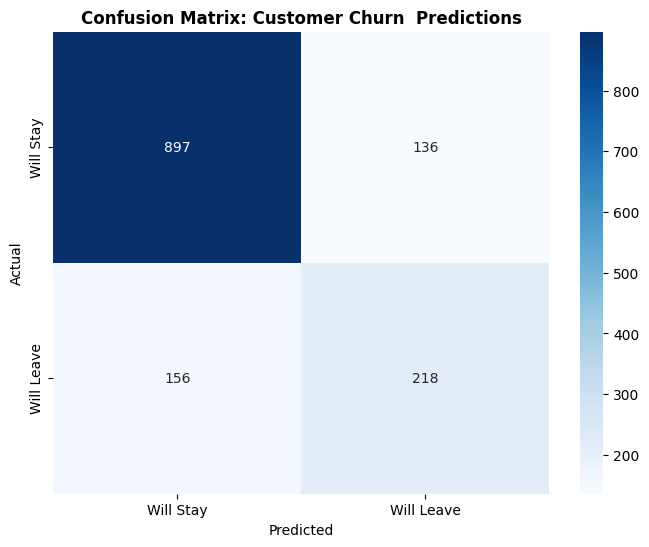

In [261]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Will Stay', 'Will Leave'],
            yticklabels=['Will Stay', 'Will Leave'])
plt.title('Confusion Matrix: Customer Churn  Predictions', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# after looking at all the charts i can say that the model 2 has mariginal imporvement over model in the minimizing the recall from 169 to 156 but not a great improvement

### lets try **model 3** try with regularization instead of dropout


In [262]:
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Reset session and seed
K.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Step 2: Re-build the same regularized model
reg_model_es = Sequential([
    Dense(64, input_shape=(X_train_normalized.shape[1],), activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(32, activation='tanh', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])
# Compile with loss function and optimizer
from keras.metrics import Precision, Recall
reg_model_es.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [263]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_recall',   # must match the metric name
    mode='max',             # because higher recall is better
    patience=5,
    restore_best_weights=True
)
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = dict(enumerate(class_weights))

reg_es_history = reg_model_es.fit(
    X_train_normalized, y_train_int,
validation_data=(X_test_normalized, y_test_int),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=0
)

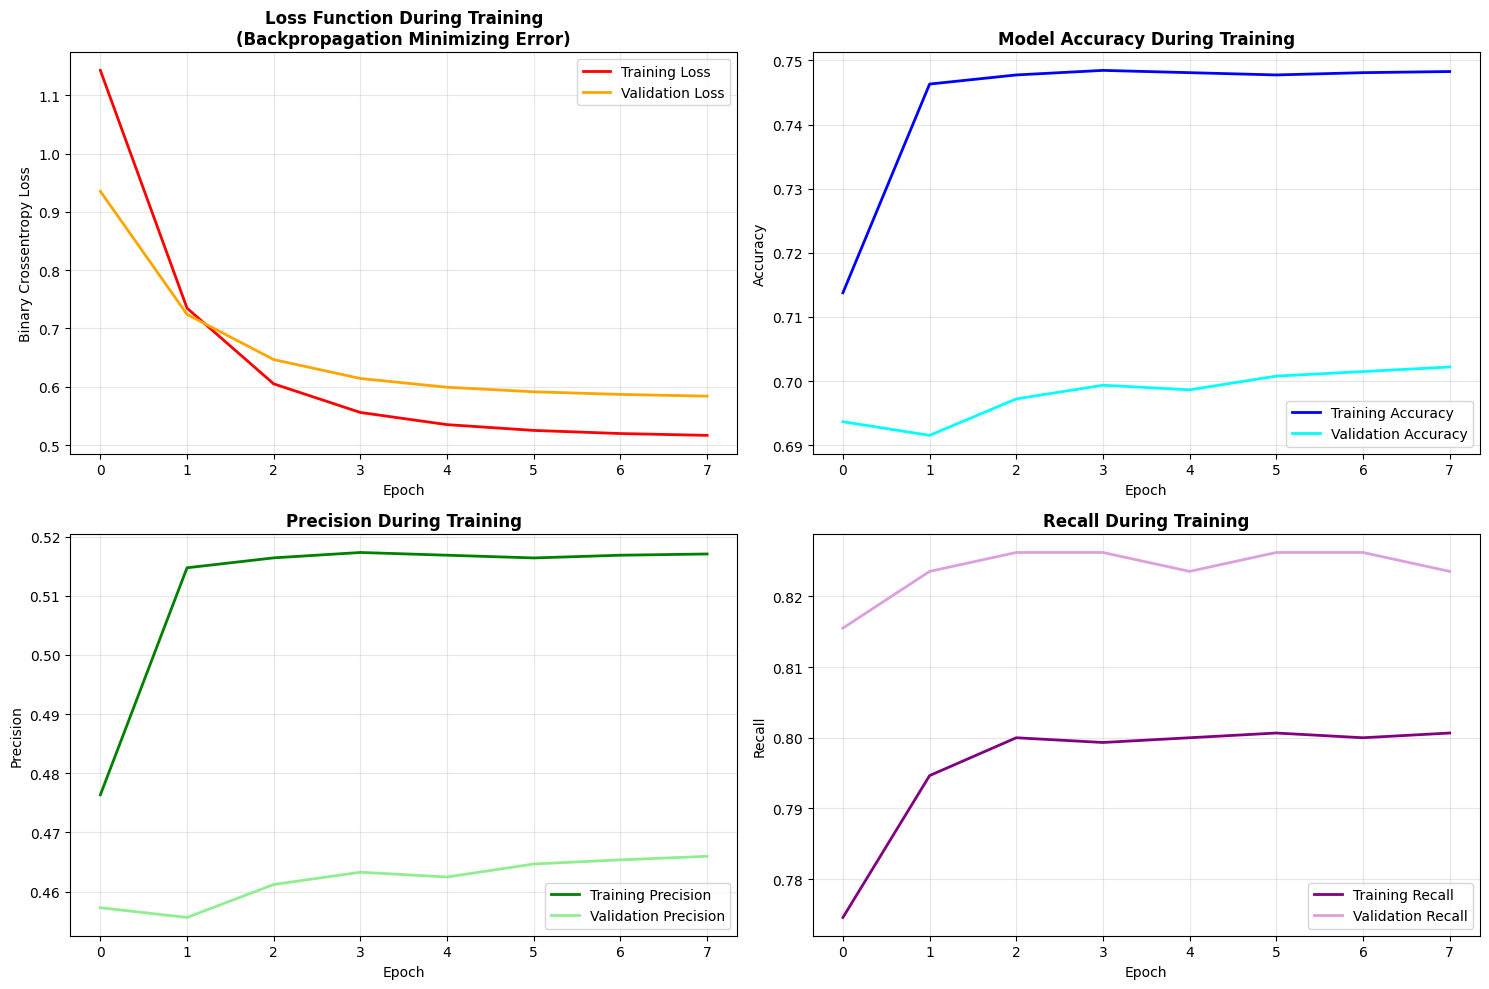

In [264]:
# Visualize the learning process
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
# Loss over time
ax1.plot(reg_es_history.history['loss'], label='Training Loss', color='red', linewidth=2)
ax1.plot(reg_es_history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
ax1.set_title('Loss Function During Training\n(Backpropagation Minimizing Error)', fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Binary Crossentropy Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy over time
ax2.plot(reg_es_history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax2.plot(reg_es_history.history['val_accuracy'], label='Validation Accuracy', color='cyan', linewidth=2)
ax2.set_title('Model Accuracy During Training', fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Precision over time
ax3.plot(reg_es_history.history['precision'], label='Training Precision', color='green', linewidth=2)
ax3.plot(reg_es_history.history['val_precision'], label='Validation Precision', color='lightgreen', linewidth=2)
ax3.set_title('Precision During Training', fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Precision')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Recall over time
ax4.plot(reg_es_history.history['recall'], label='Training Recall', color='purple', linewidth=2)
ax4.plot(reg_es_history.history['val_recall'], label='Validation Recall', color='plum', linewidth=2)
ax4.set_title('Recall During Training', fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Recall')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [265]:
# Evaluate on test set
test_loss, test_accuracy, test_precision, test_recall = reg_model_es.evaluate(X_test_normalized, y_test_int, verbose=0)

In [266]:
# Make predictions
predictions = reg_model_es.predict(X_test_normalized, verbose=0)
predicted_classes = (predictions > 0.5).astype(int)

In [267]:
print(classification_report(y_test_int, predicted_classes,
                          target_names=['Will Stay', 'Will Leave']))

              precision    recall  f1-score   support

   Will Stay       0.91      0.65      0.76      1033
  Will Leave       0.46      0.83      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.79      0.70      0.71      1407



In [268]:
cm = confusion_matrix(y_test_int, predicted_classes)

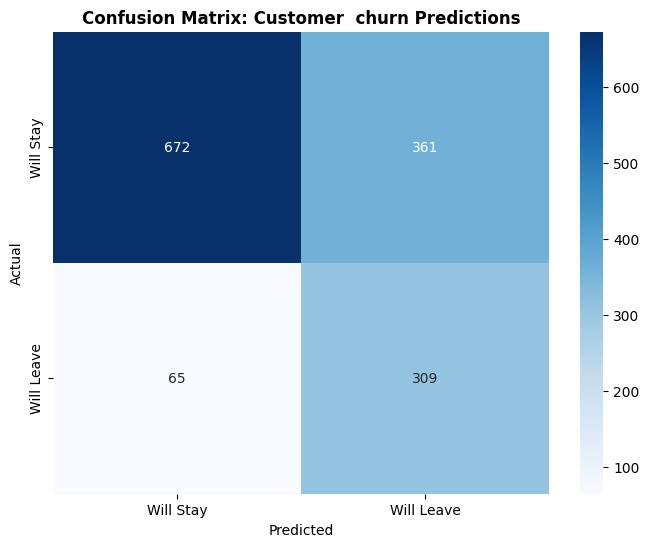

In [269]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Will Stay', 'Will Leave'],
            yticklabels=['Will Stay', 'Will Leave'])
plt.title('Confusion Matrix: Customer  churn Predictions', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Here we have trained the 3rd model with class weights, tanh activation,regularization and early stopping

our model has ***significantly imporved*** in minimizing false positive from
* model 1: 169
* model 2: 156
* model 3: 65

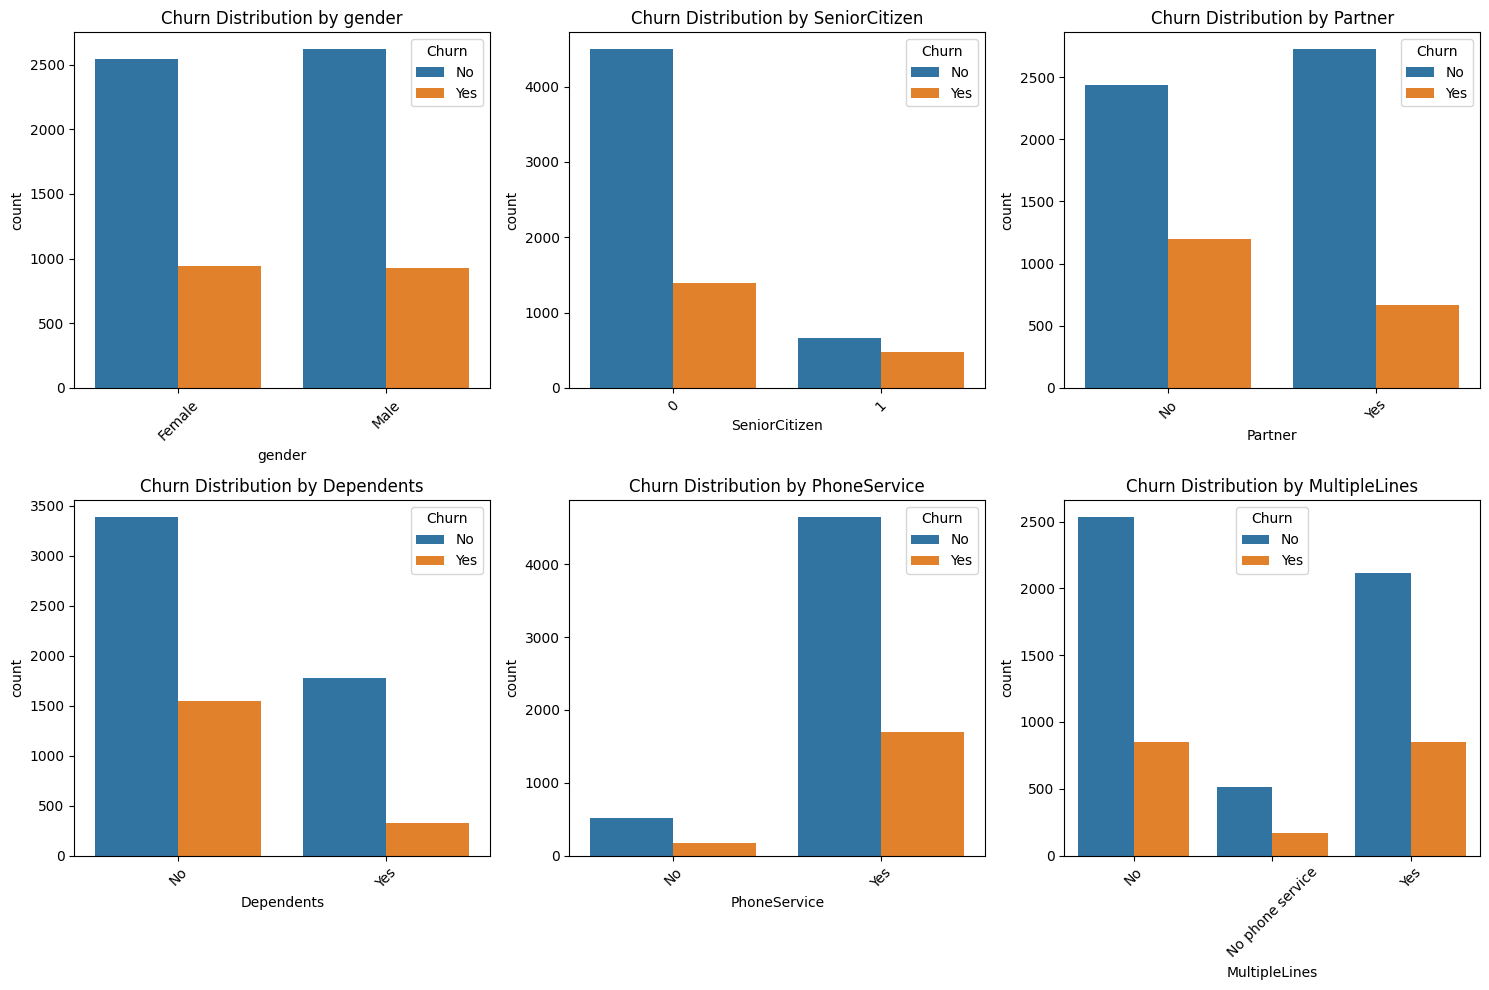

In [270]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame including the churn column encoded as 'Yes'/'No'

# List of top categorical features to analyze
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', ]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Churn Distribution by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


## **churn predictors features**

### No dependers and no partners have a lot of churn

## **retention strtegy**

### deals on adding a partern or dependent low price for 2nd line or on internet service


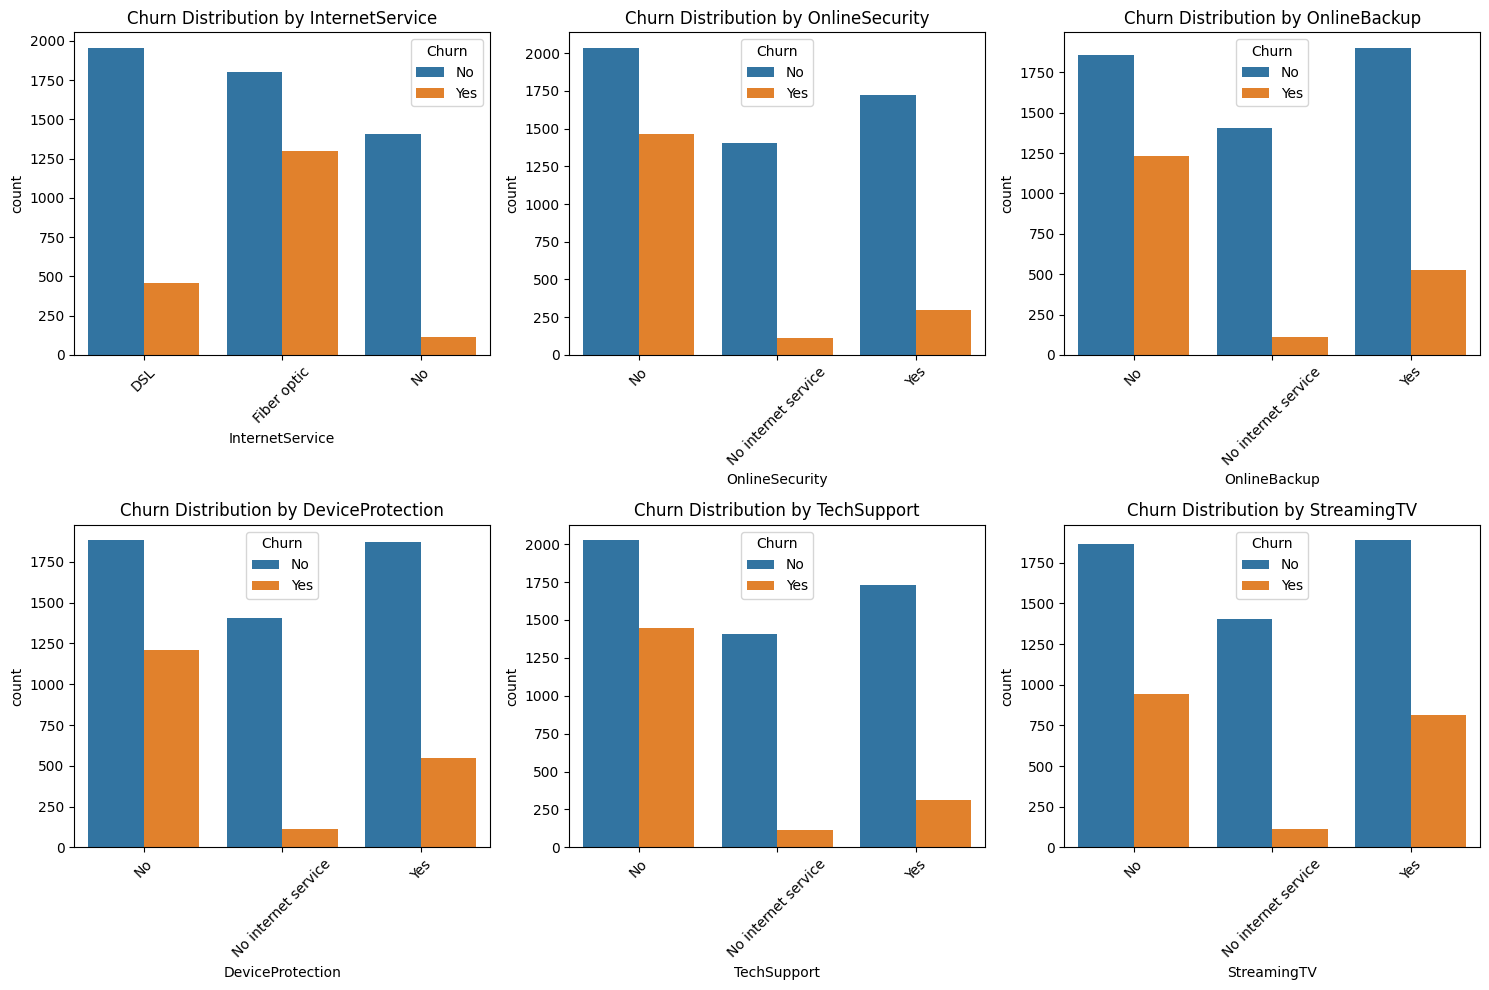

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame including the churn column encoded as 'Yes'/'No'

# List of top categorical features to analyze
features = ['InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', ]
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Churn Distribution by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


## **churn predictors features**

### Not getting tech support online security and device protection and fiber optics are major reasons for churn

## **retention strtegy**

### free tech support tutorials , online security app and discounts on fiber optic bundles


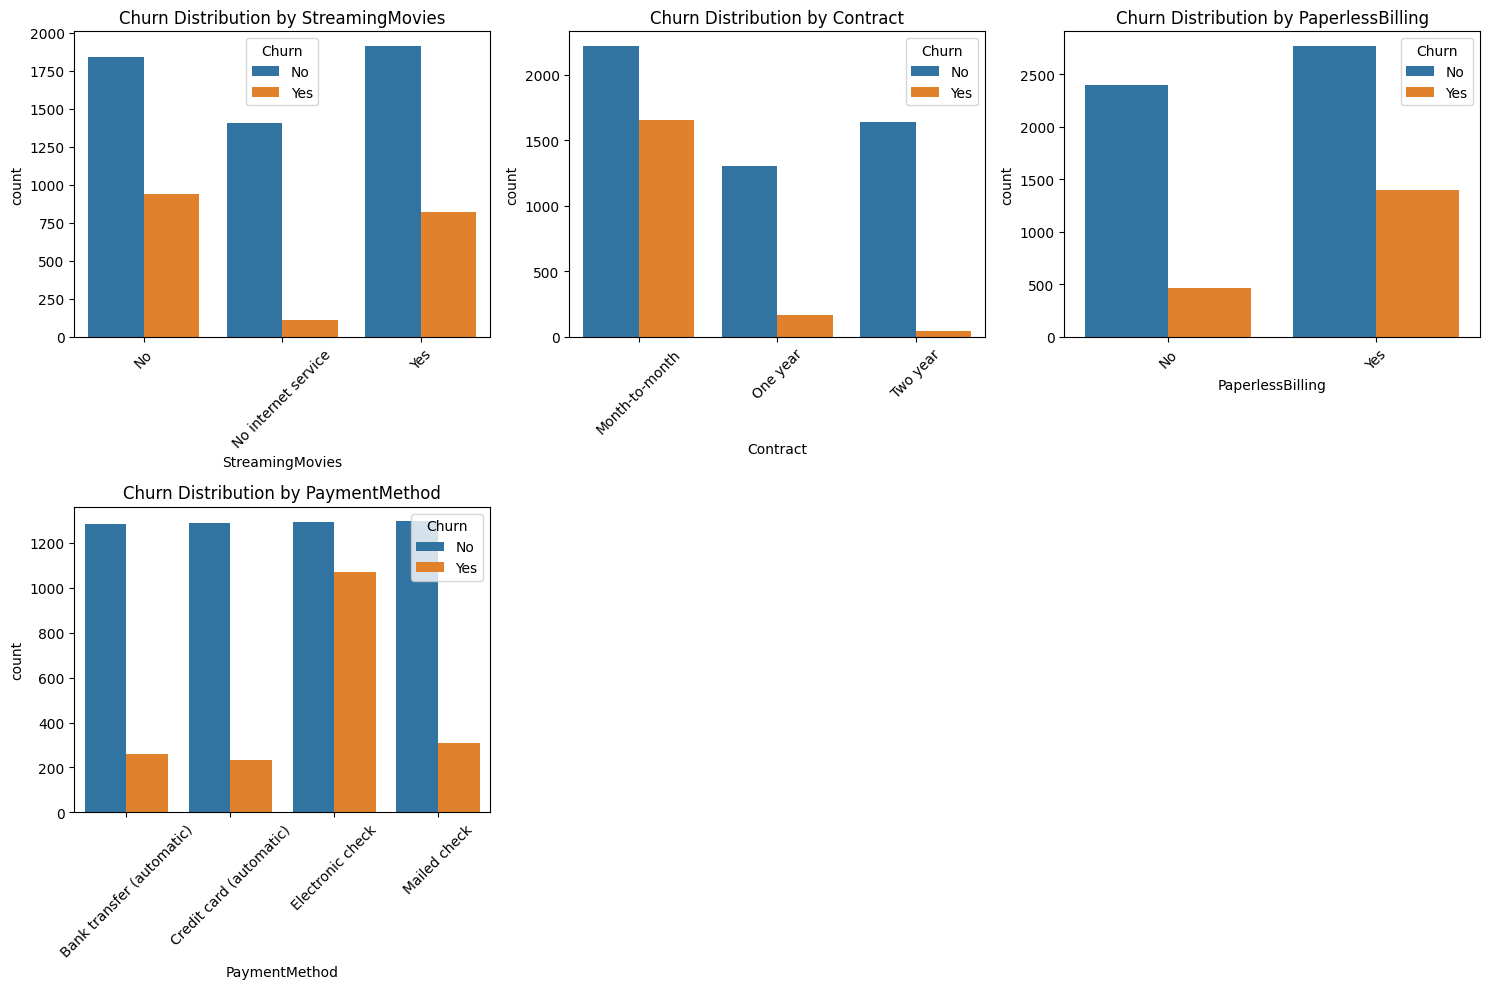

In [272]:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original DataFrame including the churn column encoded as 'Yes'/'No'

# List of top categorical features to analyze
features = ['StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Churn Distribution by {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



## **churn predictors features**

### electronic check and month to month contract have a lot of churn

## **retention strtegy**

### offering cheaper price for a  2 year contract , offering discounts on using credit card or partnering up with major banks to provide more points on using credit card for phone bill payments  



* #  hardest part was understanding the model and building it there is no simple way to build an ANN and it has a lot of moving parts like hyperparameter and diffrent architecture layers and neurons would be easier if we had more time to experiment more models but no way of knowing the perfect model

* ##  also the class imbalance is difficult to work with

* ### i would try to see if i can use both dropout and regularization use smote to create artifical 1 ( churn customers)



# understanding how a model functions is very important to take any decision for example 3rd model is great at minimizing false negative  or customer that will leave after predicting stay so we end up giving out more to the customers predictied to leave but would actually stay so if we dont have a proper profit model it would be hard to select which matices to optimize and therefore model could do more harm than good

